# COVID CASES OF INDIA :-Future prediction of number of confirmed cases in Delhi

Here we have taken dataset from kaggle and which consist of information about covid cases in different states of india .In this dataset we have Time,Date ,state , confirmed ,cured and death cases of count till 9 december.Since in india there are lot of states we will be working with only Capital of India which is Delhi and try to predict number of covid cases in next month.

### Loading libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset

In [45]:
df=pd.read_csv("covid_19_india.csv")

In [46]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


### Checking null values 

In [47]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

we can clearly see there are no null values in the dataset

### Checking date format

In [48]:
df.Date.describe()

count         9291
unique         315
top       11/06/20
freq            37
Name: Date, dtype: object

we can clearly see that date is not in the right format so we will change the format of date

In [49]:
df.Date=pd.to_datetime(df.Date,dayfirst=True)

### Setting index as Date for time series analysis

In [50]:
df.set_index("Date",inplace=True)

In [51]:
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


### Seperating dataset for only Capital of India i.e Delhi

In [52]:
newdf=df.loc[df['State/UnionTerritory']=='Delhi']

In [53]:
newdf.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-03-02,35,6:00 PM,Delhi,1,0,0,0,1
2020-03-03,39,6:00 PM,Delhi,1,0,0,0,1
2020-03-04,43,6:00 PM,Delhi,1,0,0,0,1
2020-03-05,46,6:00 PM,Delhi,2,0,0,0,2
2020-03-06,52,6:00 PM,Delhi,3,0,0,0,3


### Setting frequency of data

In [54]:
a=newdf.asfreq('d')

### Plotting Confirmed cases of Delhi

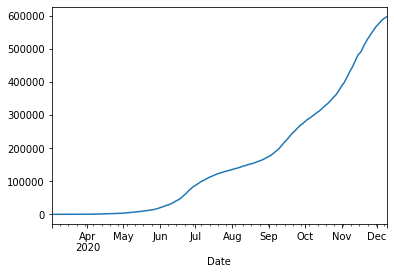

In [55]:
a.Confirmed.plot()

## Checking Seasonality 

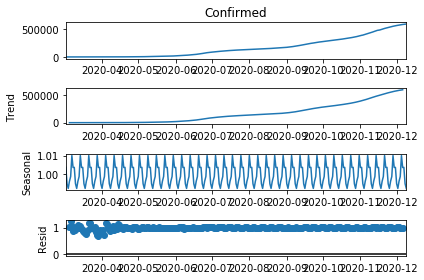

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

season=seasonal_decompose(a.Confirmed,model="multiplicative")
season.plot();

From season graph we can clearly see that seasonality exist in this dataset

## Checking stationary

In [17]:
import statsmodels.tsa.stattools as sts
sts.adfuller(a.Confirmed)

(2.203803880997291,
 0.9988856202952823,
 16,
 266,
 {'1%': -3.455175292841607,
  '10%': -2.57259315846006,
  '5%': -2.8724677563219485},
 4084.6637994093635)

Since the p value is greater than 0.05 hence our data is non - stationary

## Splitting data set into training and testing data

In [18]:
size=int(len(a)*0.8)
df_train,df_test=a.iloc[:size],a.iloc[size:]

In [19]:
from pmdarima import auto_arima

### Using auto arima to find best order 

In [20]:
b=auto_arima(a['Confirmed'],seasonal=True,m=7)

In [21]:
b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  283
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 7)   Log Likelihood               -2136.827
Date:                           Sat, 12 Dec 2020   AIC                           4281.654
Time:                                   03:08:23   BIC                           4296.207
Sample:                                        0   HQIC                          4287.490
                                           - 283                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4137      0.045     -9.121      0.000      -0.503      -0.325
ar.S.L7        0.9742      0.029     33.201      0.000       0.917       1.032
ma.S.L7       -0.7708      0.063    -12.172      0.000      -0.895      -0.647
sigma2      2.298e+05   6996.980     32.844      0.000    2.16e+05    2.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8624.44
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              30.53   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fitting SARIMAX model

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_train['Confirmed'],order=(0,2,1),exog=df_train[['Deaths','Cured']],seasonal_order=(1,0,1,7))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Confirmed   No. Observations:                  226
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 7)   Log Likelihood               -1593.205
Date:                           Sat, 12 Dec 2020   AIC                           3198.410
Time:                                   03:08:24   BIC                           3218.879
Sample:                               03-02-2020   HQIC                          3206.672
                                    - 10-13-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Deaths         0.6816      0.445      1.532      0.126      -0.190       1.554
Cured          0.1291      0.031      4.189      0.000       0.069       0.190
ma.L1         -0.4430      0.038    -11.692      0.000      -0.517      -0.369
ar.S.L7        0.9467      0.050     18.878      0.000       0.848       1.045
ma.S.L7       -0.6871      0.083     -8.240      0.000      -0.851      -0.524
sigma2      8.603e+04   4803.447     17.909      0.000    7.66e+04    9.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):               464.32
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):              13.36   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Checking prediction

In [23]:
start=len(df_train)

In [24]:
end=len(df_train)+len(df_test)-1

In [25]:
prediction=result.predict(start,end,exog=df_test[['Deaths','Cured']]).rename("sarimax model")

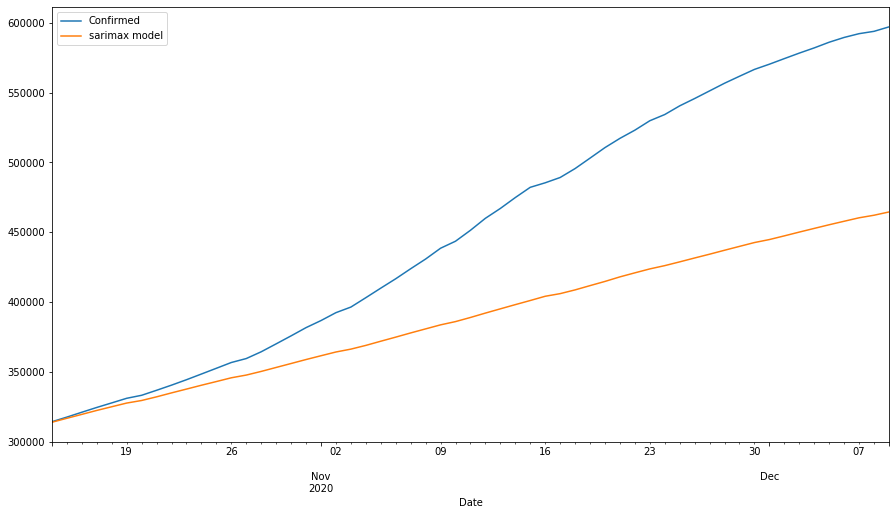

In [26]:
df_test['Confirmed'].plot(legend=True,figsize=(15,8))
prediction.plot(legend=True)


we can clearly see that there are some seperation between prediction and real values we can check rmse to find how of are values are

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
rmse(df_test['Confirmed'],prediction)

79838.40262737242

In [29]:
df_test['Confirmed'].mean()

453543.43859649124

We can see that  mean value of test set is  4 lakh while our rmse is 79 thousand which is not so bad as compared to so huge mean

# Predicting future values for next month

In [47]:
import statsmodels.graphics.tsaplots as sgt

In [35]:
models=SARIMAX(a['Confirmed'],order=(0,2,1),seasonal_order=(1,0,1,7))
result=models.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Confirmed   No. Observations:                  283
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 7)   Log Likelihood               -2136.827
Date:                           Sat, 12 Dec 2020   AIC                           4281.654
Time:                                   03:35:38   BIC                           4296.207
Sample:                               03-02-2020   HQIC                          4287.490
                                    - 12-09-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4137      0.045     -9.121      0.000      -0.503      -0.325
ar.S.L7        0.9742      0.029     33.201      0.000       0.917       1.032
ma.S.L7       -0.7708      0.063    -12.172      0.000      -0.895      -0.647
sigma2      2.298e+05   6996.980     32.844      0.000    2.16e+05    2.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8624.44
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              30.53   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
fcast=result.predict(len(a),len(a)+30,type='levels').rename("New SARIMA")


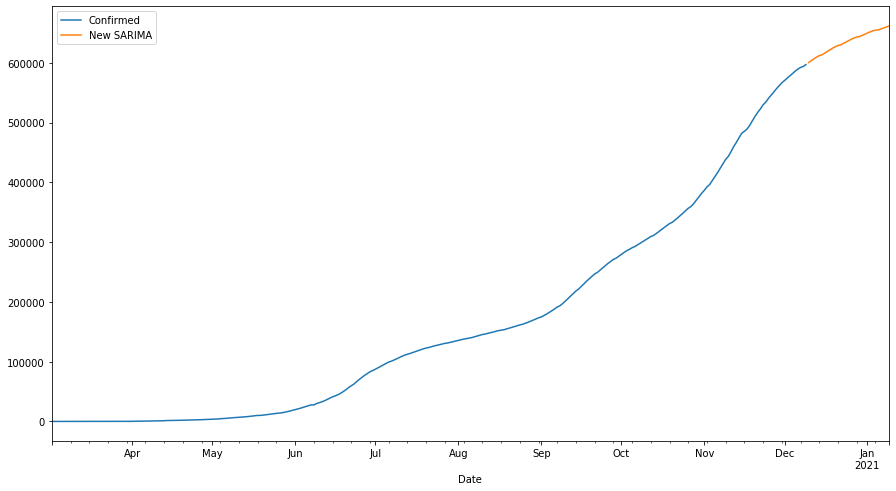

In [40]:
a['Confirmed'].plot(legend=True,figsize=(15,8))
fcast.plot(legend=True)